In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv('fuel_econ.csv')
df.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [59]:
np.random.seed(33)

In [67]:
sample = np.random.choice(df.shape[0], 300, replace=False)
df_subset = df.loc[sample]

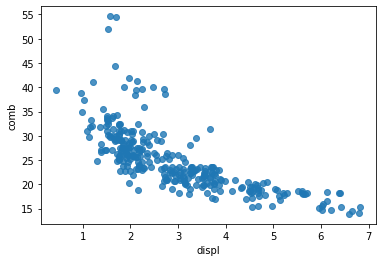

In [68]:
sns.regplot(data=df_subset, x='displ', y='comb', x_jitter=0.3, fit_reg=False);

In [69]:
df_subset['trans_type'] = df_subset['trans'].apply(lambda x: x.split()[0])

In [70]:
df_subset['trans_type'].value_counts()

Automatic    240
Manual        60
Name: trans_type, dtype: int64

In [71]:
trans_type_markers = np.array([['Automatic', 'o'], 
                      ['Manual', '^']])

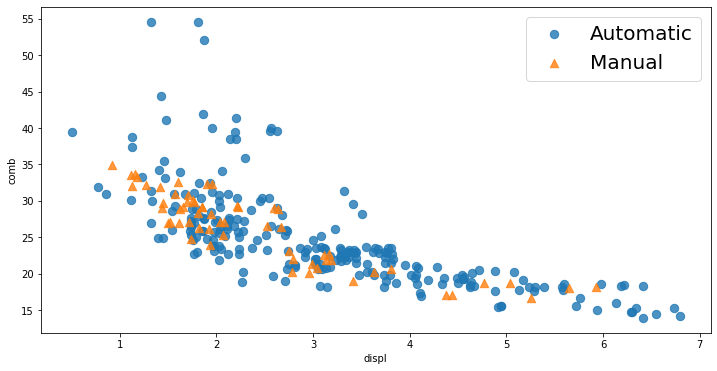

In [72]:
plt.figure(figsize=(12,6))
for ttype, marker in trans_type_markers:
    plot_data = df_subset[df_subset['trans_type'] == ttype]
    
    sns.regplot(data=plot_data, x='displ', y='comb', x_jitter=0.3, fit_reg=False, marker=marker, scatter_kws={'s':70})
plt.legend(trans_type_markers[:,0], prop={'size':20});

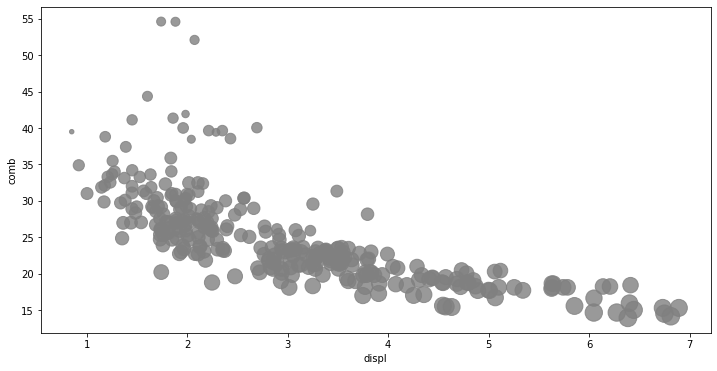

In [80]:
plt.figure(figsize=(12,6))
sns.regplot(data=df_subset, x='displ', y='comb', x_jitter=0.3, fit_reg=False, color='grey',
           scatter_kws={'s' : df_subset['co2']/2});

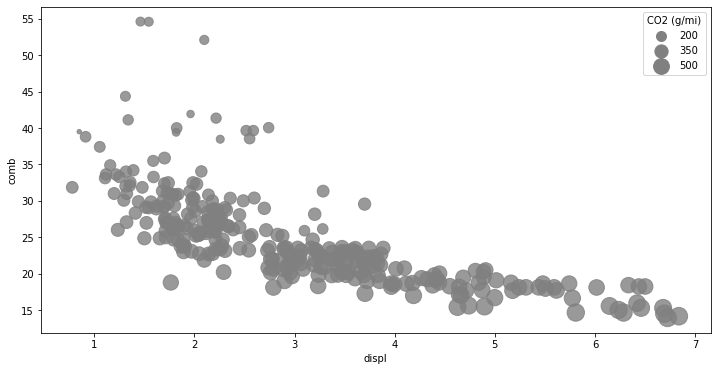

In [84]:
plt.figure(figsize=(12,6))
sns.regplot(data=df_subset, x='displ', y='comb', x_jitter=0.3, fit_reg=False, color='grey',
           scatter_kws={'s' : df_subset['co2']/2});
sizes = [200, 350, 500]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([],[], s = s/2, color='grey'))
plt.legend(legend_obj, sizes, title='CO2 (g/mi)');
    

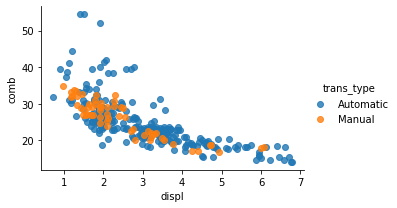

In [95]:
g = sns.FacetGrid(data=df_subset, hue='trans_type',
                 hue_order=['Automatic', 'Manual'], height=3, aspect=1.5)
g = g.map(sns.regplot, 'displ', 'comb', x_jitter=0.3, fit_reg=False)
g.add_legend();

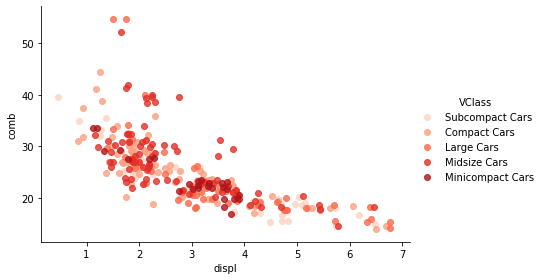

In [107]:
g = sns.FacetGrid(data=df_subset, hue='VClass', height=4, aspect=1.5, palette='Reds')
g = g.map(sns.regplot, 'displ', 'comb', x_jitter=0.3, fit_reg=False)
g.add_legend();

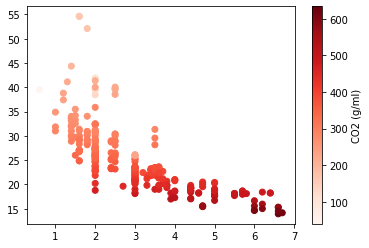

In [115]:
plt.scatter(data=df_subset, x='displ', y='comb', c='co2', cmap = 'Reds')
plt.colorbar(label='CO2 (g/ml)');